# San Francisco Housing Cost Analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt


import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv



Bad key "text.kerning_factor" on line 4 in
C:\Users\Jordan\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# Mapbox API key (need to move over env)
load_dotenv()
mapbox_api = os.getenv("mapbox_key")
px.set_mapbox_access_token(mapbox_api)

## Load Data

In [4]:
# Read in census data as df
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


## Housing Units/ Yr

**Optional Challenge:** Use max, min, & std to scale y limits of chart

In [5]:
# Calc mean housing units/yr 
sfo_data["housing_units"].groupby("year").mean()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [6]:
# Save the df as a csv
mean_units_per_yr = sfo_data["housing_units"].groupby("year").mean()
mean_units_per_yr.to_csv("Data/mean_units_yr.csv",header=False)

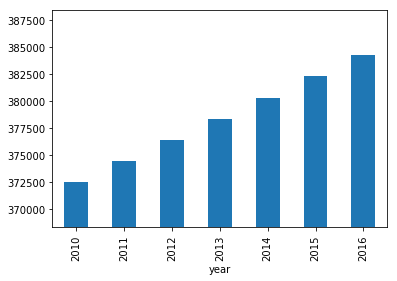

In [7]:
# plot avg housing/yr
fig_mean_units = plt.figure()

mean_units_plot= mean_units_per_yr.plot.bar()

min_lim = mean_units_per_yr.min() - mean_units_per_yr.std()
max_lim = mean_units_per_yr.max() + mean_units_per_yr.std()
mean_units_plot.set_ylim(min_lim, max_lim)

# show and close to make sure the limits above don't affect later plots
plt.show()
plt.close(fig_mean_units)

In [8]:
# double bracket to call multiple columns
avg_house_cost=sfo_data[["sale_price_sqr_foot","gross_rent"]].groupby("year").mean()
avg_house_cost

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


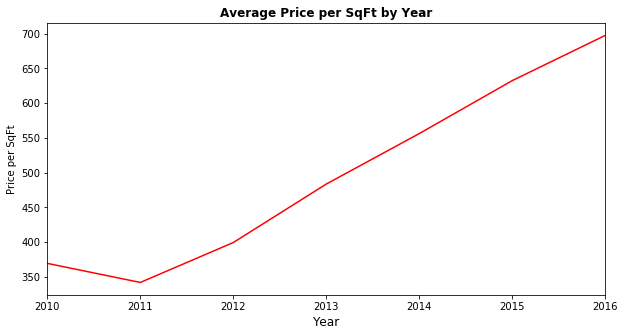

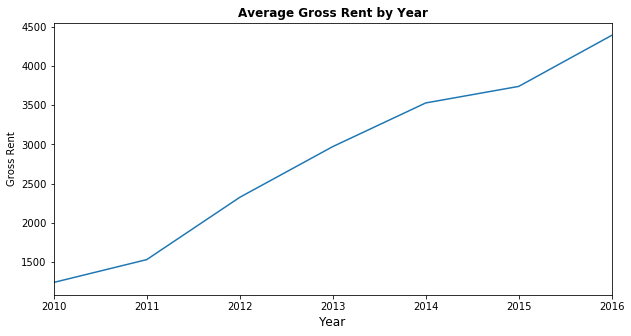

In [120]:
# avg sale price & avg gross rent line plots
fig_sales_sqft = plt.figure()

sales_sqft_plot= avg_house_cost["sale_price_sqr_foot"].plot(color="red",figsize=(10,5))
# set_ to label title, x-axis, and y axis
sales_sqft_plot.set_title("Average Price per SqFt by Year",fontweight="bold")
sales_sqft_plot.set_xlabel("Year",fontsize=12)
sales_sqft_plot.set_ylabel("Price per SqFt")

plt.show()
plt.close(fig_sales_sqft)

fig_gross_rent = plt.figure()

gross_rent_plot= avg_house_cost["gross_rent"].plot(figsize=(10,5))

gross_rent_plot.set_title("Average Gross Rent by Year",fontweight="bold")
gross_rent_plot.set_xlabel("Year",fontsize=12)
gross_rent_plot.set_ylabel("Gross Rent")

plt.show()
plt.close(fig_gross_rent)

In [10]:
avg_price_neigh= sfo_data.groupby([sfo_data.index,"neighborhood"]).mean()
avg_price_neigh.reset_index(inplace=True)
avg_price_neigh.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [11]:
# 
avg_price_neigh.hvplot.line(
    x = "year",
    y = "sale_price_sqr_foot",
    groupby="neighborhood",
    xlabel="Year",
    ylabel="Avg Price per Square Foot",
    title = "Average price per sqft by neighborhood"
)

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [12]:
avg_price_neigh.hvplot.line(
    x = "year",
    y = "gross_rent",
    groupby="neighborhood",
    xlabel="Year",
    ylabel="Avg Gross Rent per Year",
    title = "Average Gross Rent by Neighborhood"
)

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

In [13]:
# grouping neighborhoods by yearly mean to present
expens_neigh= avg_price_neigh.groupby("neighborhood").mean()
expens_neigh.drop(columns="year",inplace=True)
expens_neigh.sort_values(by="sale_price_sqr_foot", ascending=False, inplace=True)
top_ten_neigh= expens_neigh.head(10)

# Plot setup
expens_neigh_plot = top_ten_neigh.hvplot.bar(
    x = "neighborhood",
    y = "sale_price_sqr_foot",
    xlabel="Neighborhood",
    ylabel="Avg Sales Price per Square Foot",
    title = "Top 10 Most Expensive Neighborhoods in SFO"
# with options for viewability
).opts(fontsize={
    'title': 15, 
    'labels': 12, 
    'xticks': 10, 
    'yticks': 10},
       height=400, 
       width=600, 
       xrotation=90)

In [14]:
expens_neigh_plot

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [15]:
# Sale Price vs Rent Income with multiple y for sidebyside bars; opts for viewability
avg_sale_rent = avg_price_neigh.hvplot.bar(
    x = "year",
    y = ["sale_price_sqr_foot", "gross_rent"],
    groupby="neighborhood",
    xlabel="Year",
    ylabel="Price in Dollars",
    title = "Rent Income vs Purchase Cost"
).opts(fontsize={
    'title': 15, 
    'labels': 12, 
    'xticks': 10, 
    'yticks': 10},
       height=500, 
       width=600, 
       xrotation=90) 
avg_sale_rent

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

# Neighborhood Map

In [37]:
# Coordinate Data
coords = pd.read_csv(Path("Data/neighborhoods_coordinates.csv"))
coords["neighborhood"]= coords["Neighborhood"]
coords.set_index("neighborhood", inplace=True)
neigh_avg= avg_price_neigh.groupby("neighborhood").mean()
neigh_avg.drop(columns="year",inplace=True)
coords.drop(columns="Neighborhood", inplace=True)
# # joining data with average price table
neigh_coords = pd.concat([neigh_avg, coords], axis=1, join="inner")
neigh_coords.reset_index(inplace=True)
# neigh_coords

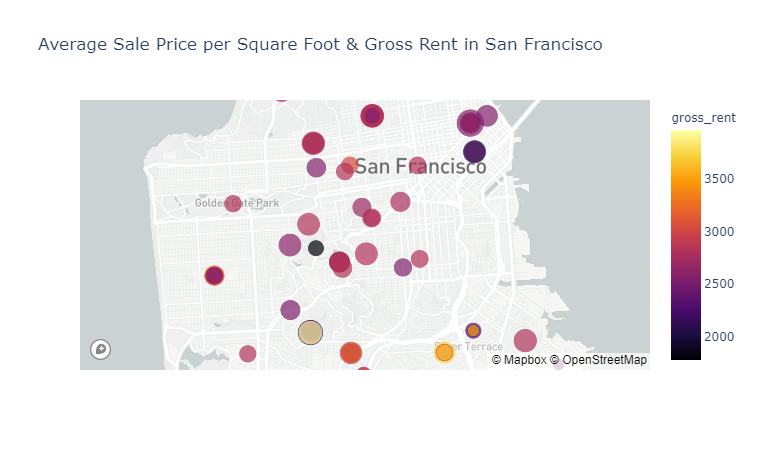

In [94]:
# scatter mapbox plot
neigh_map = px.scatter_mapbox(
    neigh_coords, 
    lat="Lat", 
    lon="Lon", 
    color="gross_rent",
    hover_name= "neighborhood",
    color_continuous_scale="inferno",
    size="sale_price_sqr_foot",
    zoom=11,
    title = "Average Sale Price per Square Foot & Gross Rent in San Francisco")
neigh_map

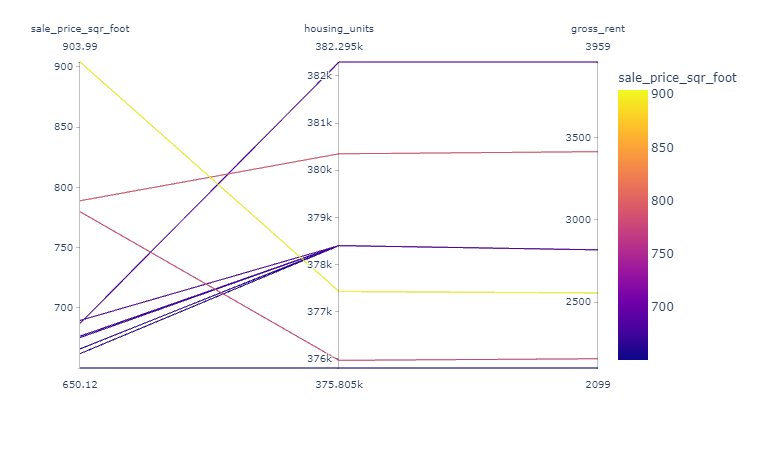

In [23]:
# parallel coordinates for most expensive neighborhoods
# need to remove neighborhood for this plot
px.parallel_coordinates(
    top_ten_neigh, 
    dimensions= ["sale_price_sqr_foot","gross_rent","housing_units"],
    color="sale_price_sqr_foot")

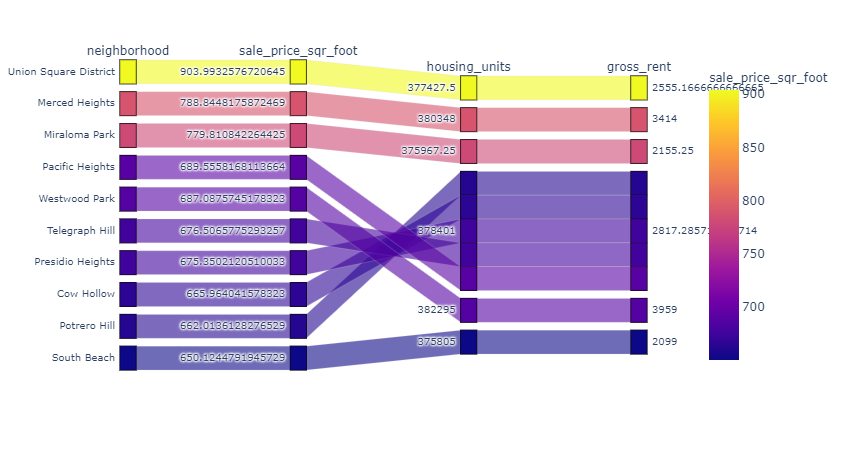

In [27]:
# categories needs neighborhood, reset index to include in plot
top_ten_neigh.reset_index(inplace=True)
px.parallel_categories(
    top_ten_neigh, 
    dimensions= ["sale_price_sqr_foot","gross_rent","housing_units","neighborhood"],
    color="sale_price_sqr_foot")

Cannot use expens_neigh nor top_ten_neigh bc values are already grouped by neighborhood. 
df = df[(df['closing_price'] >= 99) & (df['closing_price'] <= 101)]
DF needs 
 - neighborhood
 - year
 - sale_price_sqr_ft
 - gross_rent
 - housing_units

In [97]:
# avg_price_neigh.dropna(inplace=True) op completed    

In [113]:
# Set a max price range filter to show resultant 4 most expensive neighborhoods/yr
max_price_yr = avg_price_neigh.groupby("year")["sale_price_sqr_foot"].nlargest(4)
row_filter = [max_price_yr[i]==v for i, v in zip(avg_price_neigh['year'], avg_price_neigh['sale_price_sqr_foot'])]
sb_yr_max = avg_price_neigh[row_filter]

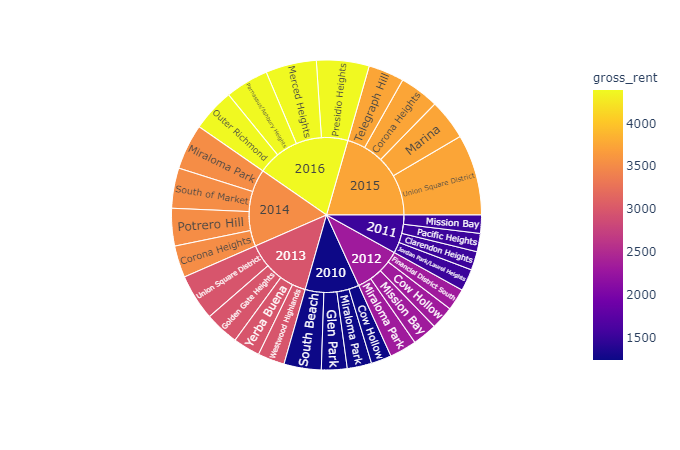

In [119]:
# Sunburst plot for Cost analysis (with top sales prices)
px.sunburst(
    sb_yr_max,
    path=["year","neighborhood"],
    values="sale_price_sqr_foot",
    color="gross_rent"
   )